# Block Cipher

Please, install the [Pycryptodome](https://github.com/Legrandin/pycryptodome) packages before running the code.

In [1]:
# plot image functions import
from matplotlib.image import imread, imsave
# pycryptodome counter functions import
from Crypto.Util import Counter
# math function import
from math import pi
# blockcipher.py module import
from blockcipher import *

## Introduction

**Block ciphers** are a basic cryptographic tool that uses *symmetric keys to encrypt fixed-size data*. A prime example is the Advanced Encryption Standard (*AES*), which operates in 128-bit blocks. A variety of operating procedures can be used to ensure that multiple blocks are secured with a single key. These include Electronic codebook (*ECB*), Cipher block chaining (*CBC*), Cipher feedback (*CFB*) and accounting (*CTR*)[[1]](#[1]). Utilizing **Monte Carlo simulations** and leveraging the Law of Large Numbers, we can assess the security level of Block ciphers, such as AES, by calculating the **Hamming Distance** for encrypted text following the processes of Diffusion and Confusion. Ultimately, taking a step back into stream cipher, we will examine the implementation of a specific stream cipher that resembles a block cipher, namely **RC4**, with a particular emphasis on its security attributes.

## AES

The ***Advanced Encryption Standard*** (AES) is a symmetric-key encryption specification established by the National Institute of Standards and Technology (**NIST**). It was subsequently adopted by the U.S. government for securing sensitive information. AES is derived from the **Rijndael** cipher collection and includes three block ciphers. Each cipher operates on a 128-bit block size, but they differ in key sizes. The varying key sizes offer different levels of security, with longer keys providing stronger encryption. From the variety of operating procedures, ECB is the most basic mode, encrypting each block separately. However, it has security limitations because the same plaintext blocks give the same ciphertext. CBC, CFB and CTR enhance security by adding pre-generated information or accounts to the encryption process[[1]](#[1]). AES is widely recognized for its **robustness and efficiency**, making it a global standard in data encryption. AES’s design also serve as **building blocks** in other cryptographic protocols, such as universal hash functions and pseudo-random number generators[[2]](#[2]).

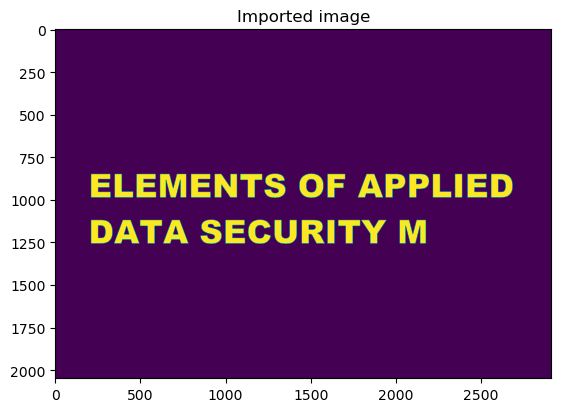

In [2]:
img_read = imread('image.png').mean(axis=-1)
img = 255 * img_read.astype(np.uint8)

# show it
plt.title('Imported image')
plt.imshow(img)

In [3]:
# key
key = b'_block-ciphers__'

# initialization counter value for CTR
ctr = Counter.new(128)
# initialization vector for CBC and CFB
iv_cbc = get_random_bytes(16)
iv_cfb = get_random_bytes(16)

### Encryption

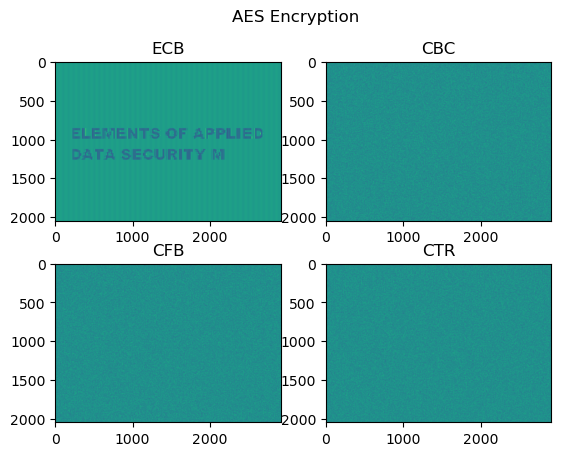

In [4]:
# create instances 
ecb_en = AES.new(key, AES.MODE_ECB)
cbc_en = AES.new(key, AES.MODE_CBC, IV=iv_cbc)
cfb_en = AES.new(key, AES.MODE_CFB, IV=iv_cfb)
ctr_en = AES.new(key, AES.MODE_CTR, counter=ctr)
# encryption
ciphertext_ecb = AES_encrypt(ecb_en, img)
ciphertext_cbc = AES_encrypt(cbc_en, img)
ciphertext_cfb = AES_encrypt(cfb_en, img)
ciphertext_ctr = AES_encrypt(ctr_en, img)
# plot
imgs = [ciphertext_ecb, ciphertext_cbc, ciphertext_cfb, ciphertext_ctr]
names = ['ECB','CBC','CFB','CTR']

grid_plot(imgs,names,'AES Encryption')

In [5]:
# save encrypted image
for i in range(len(imgs)):
    imsave(f'{names[i]}.png', imgs[i], format='png')

Due to the encryption is working as expected, each mode's encrypted image look like random noise. Patterns or recognizable features in the encrypted image suggest **weak encryption (ECB)**. With the addition of feedback mechanism or using different counter values, the encrypted image appears random, with no visible patterns, indicating **strong encryption (CBC,CFB and CTR)**.

### Decryption

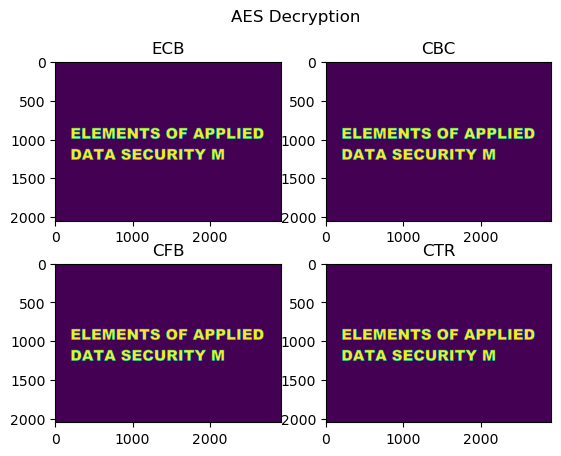

In [6]:
# create instances 
ecb_de = AES.new(key, AES.MODE_ECB)
cbc_de = AES.new(key, AES.MODE_CBC, IV=iv_cbc)
cfb_de = AES.new(key, AES.MODE_CFB, IV=iv_cfb)
ctr_de = AES.new(key, AES.MODE_CTR, counter=ctr)
# decryption
plaintext_ecb = AES_decrypt(ecb_de, ciphertext_ecb)
plaintext_cbc = AES_decrypt(cbc_de, ciphertext_cbc)
plaintext_cfb = AES_decrypt(cfb_de, ciphertext_cfb)
plaintext_ctr = AES_decrypt(ctr_de, ciphertext_ctr)
# plot
imgs = [plaintext_ecb, plaintext_cbc, plaintext_cfb, plaintext_ctr]
names = ['ECB','CBC','CFB','CTR']

grid_plot(imgs,names,'AES Decryption')

## Monte Carlo Simulations

**Monte Carlo Simulations (MCS)** is a **statistical method** that models complex scenarios involving numerous random variables. It employs repeated random sampling to simulate stochastic systems and calculate probabilities for diverse outcomes. The technique is based on the *Law of Large Numbers*, which posits that the average result from a high number of trials should approach the expected value, becoming increasingly accurate with more trials. Essentially, if certain system parameters are unknown, multiple trials can be conducted and the average taken. This allows for the exploration and understanding of unpredictable systems and situations.[[1]](#[1])

Like as used below, an example of MCS is the value estimation of π simulating random (x, y) points in a unit square and determining the proportion that falls within a unit circle.[[1]](#[1])

In [7]:
# Number of points
N = [100,1000,10000]
# init
pi_est = []
points_inside = []
x_points, y_points = [], []
err, err_per = [], []

# pi-greco estimation
for i in range(3):
    pi_, x, y, p_in = estimate_pi(N[i])
    
    pi_est.append(pi_)
    x_points.append(x)
    y_points.append(y)
    points_inside.append(p_in)
    # error
    err.append(abs(pi-pi_))
    err_per.append((err[i]/pi)*100)
    

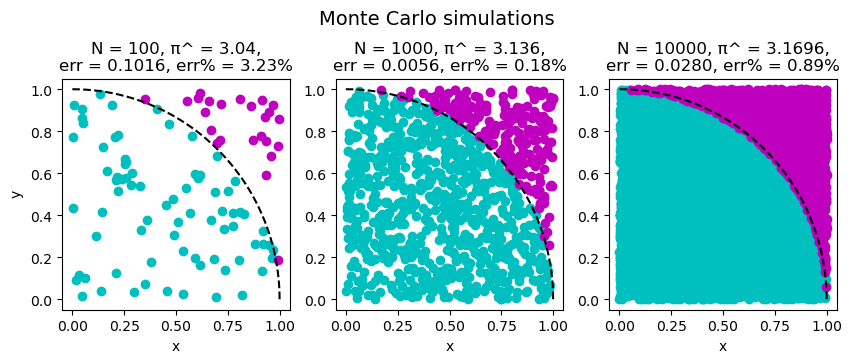

In [8]:
# subplots
fig, ax = plt.subplots(1,3,figsize=(10,3))
# Set common labels
fig.text(0.08, 0.5, 'y', ha='center', va='center', rotation='vertical')
fig.text(0.5, 1.08, 'Monte Carlo simulations', ha='center', va='center', \
         fontsize=14)

# quarter of circle
theta = np.linspace(0,np.pi/2)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

for i in range(3):
    # x,y inside circle
    x_in = [x for x,d in zip(x_points[i], points_inside[i]) if bool(d)]
    y_in = [y for y,d in zip(y_points[i], points_inside[i]) if bool(d)]
    # x,y outside circle
    x_out = [x for x,d in zip(x_points[i], points_inside[i]) if not bool(d)]
    y_out = [y for y,d in zip(y_points[i], points_inside[i]) if not bool(d)]

    
    # plot axes
    ax[i].scatter(x_in,y_in, color='c', zorder=1)
    ax[i].scatter(x_out,y_out, color='m', zorder=1)
    ax[i].set_title(f'N = {N[i]}, π^ = {pi_est[i]},\nerr = {err[i]:.4f}, err% = {err_per[i]:.2f}%')
    ax[i].set_xlabel('x')
    ax[i].plot(x_circle,y_circle,linestyle='--', color='k', zorder=2)

# plot
plt.show()

Like as expected the **Error Convergence** or estimation error approaches zero as the number of trials (N) increases, due to ***Law of Large Numbers***. Without knowing the actual value of π it's need a **Stopping Criterion**, for example one can decide when to stop based on the **desired level of precision** and the convergence trend observed. If the estimates of π begin to stabilize around a certain value with minimal fluctuation, and the percentage error remains consistently low across additional trials, it may be reasonable to conclude that the estimate is sufficiently accurate.

In general, the goal is to balance the need for precision with the computational resources available.

## AES Diffusion and Confusion

AES block cipher’s has the ability to *obscure the relationship between the plaintext and ciphertext*, ensuring that changes in the plaintext or key result in significant and unpredictable changes in the ciphertext.

In [9]:
# num of plaintext and key bits
p_bits = 128
k_bits = [128, 192, 256]
# num of trials
N = 1000

### Diffusion

It is a fundamental principle that ensures a **small change in the input**, such as flipping a single bit in the plaintext, leads to a **significant change in the output**, the ciphertext. Altering one bit in the plaintext should **statistically** change about **half of the bits** in the ciphertext, making it extremely difficult for an attacker to decipher the original message. This effect is measured using the Hamming distance, a metric that quantifies the number of bit differences between the original and altered ciphertexts[[1]](#[1]).

Due to the property of **ECB** mode, which maintains a direct relation between input and output blocks encrypting each block of plaintext independently, we can clearly observe the diffusion property of AES.

In [10]:
# compute Hamming Distance with MC simulations
dist = compute_HammingDistance(p_bits, k_bits, N, is_conf=False)

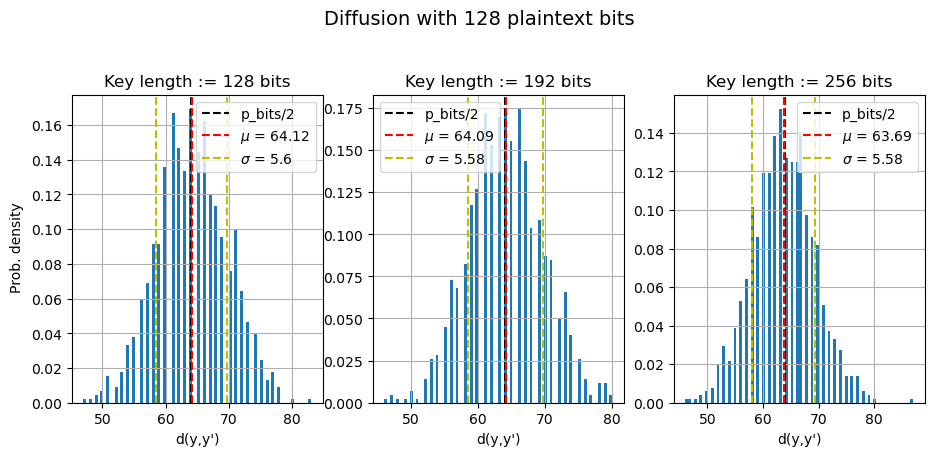

In [11]:
# plot
plot_histograms(dist, p_bits, k_bits, 'Diffusion')

As expected, good diffusion is statistically centered at half of the plaintext bits. However, when using the ECB mode of operation, it can be observed that as the size of the **plaintext increases**, diffusion remains statistically centered at 64 bits, as measured by the Hamming Distance. Due to the basic mode of operation, which encrypts each block independently, this implies **poor diffusion** properties for large plaintext sizes.

So, it is better to choose another mode of operations, for example **CBC**.

In [12]:
# num of plaintext and key bits
p_bits = 256
k_bits = [128, 192, 256]
# num of trials
N = 1000

In [13]:
# compute Hamming Distance with MC simulations
dist = compute_HammingDistance(p_bits, k_bits, N, is_conf=False, mode='CBC')

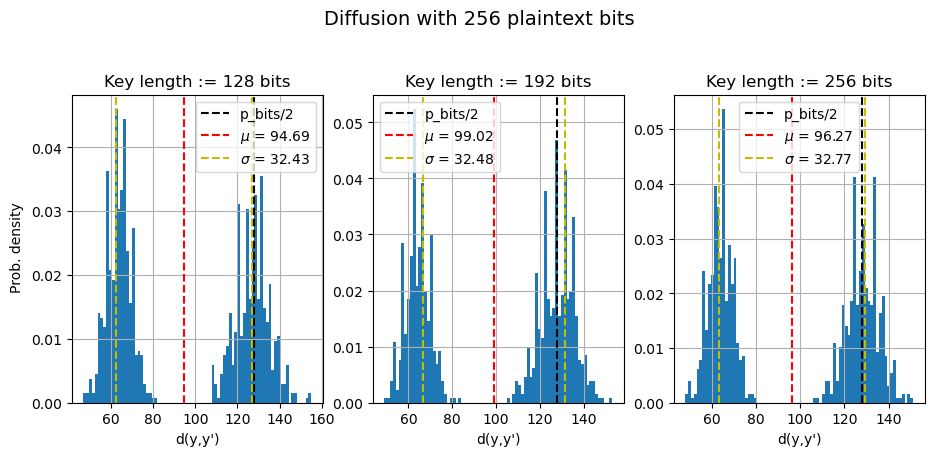

In [14]:
# plot
plot_histograms(dist, p_bits, k_bits, 'Diffusion')

### Confusion

It is another fundamental principle in cryptography that aims to make the relationship between the plaintext and the ciphertext as complex and obscure as possible. This is achieved by ensuring that **each bit of the ciphertext depends on multiple parts of the key**, making it extremely difficult for an attacker to find any correlation between the two.
So, while diffusion spreads the influence of one plaintext bit over many ciphertext bits to hide data patterns, confusion makes the relationship between the ciphertext and the encryption key as complex as possible to hide patterns in the key. Both principles work together to ensure the security of the cipher[[1]](#[1]).

Again, **CBC** mode operation is suitable for demonstrating confusion.

In [15]:
# compute Hamming Distance with MC simulations
dist = compute_HammingDistance(p_bits, k_bits, N, is_conf=True, mode='cbc')

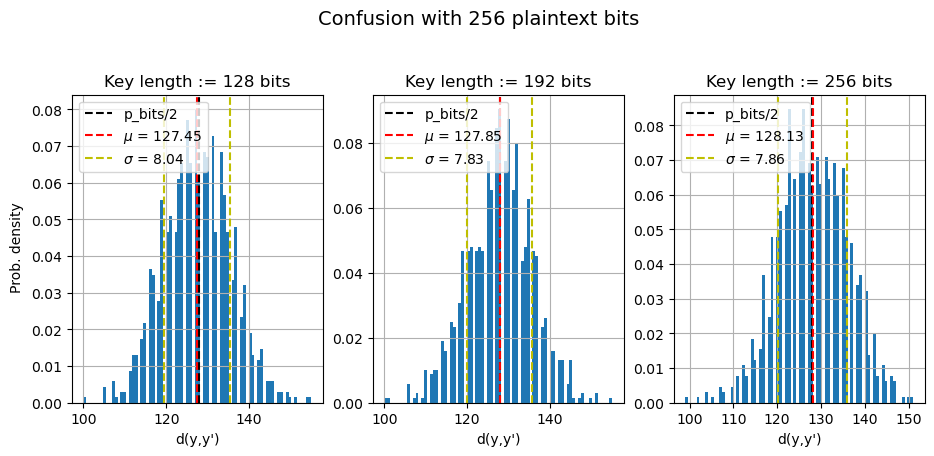

In [16]:
#plot
plot_histograms(dist, p_bits, k_bits, 'Confusion')

## RC4 Diffusion and Confusion

**Stream cipher** that creates a **byte stream** from a secret internal state, which includes a permutation (P) of all 256 possible bytes and two 8-bit index-pointers (i and j). The permutation P is initialized with a variable-length key using the **Key Scheduling Algorithm (KSA)**. However, RC4 has many known vulnerabilities, mainly related to the correlation between the key and the first bytes of the permutation P. Most of these vulnerabilities can be avoided by discarding the first n bytes of the output stream, a variant known as **RC4-drop\[n]**. The keystream is then generated using the **Pseudo-Random Generation Algorithm (PRGA)**, which updates the indexes i and j, modifies the permutation P, and generates a random byte. The generated pseudo-random byte stream is XORed with the plaintext to produce the ciphertext. Despite its vulnerabilities, RC4 is widely used due to its simplicity and speed in software[[1]](#[1]).

In [17]:
plaintextA = b'hello world!'
key = b'0123456789ABCDEF'
n = [768, 3072]

for dr in n:
    # create an instance of the RC4-based stream cipher
    alice = RC4(key, drop=dr)
    bob = RC4(key, drop=dr)

    ciphertext = alice.encrypt(plaintextA)
    plaintextB = bob.decrypt(ciphertext)

    print('RC4-drop['+str(dr)+'] encryption of "'+plaintextB.decode()+'" is', ciphertext)

RC4-drop[768] encryption of "hello world!" is b'f\xcb/\x97\x81\xc2\xdf\x1b\xc7\xc1F\xe5'
RC4-drop[3072] encryption of "hello world!" is b'/\x9e\xf9\x83@\x81}\xa9\xd0\xd4\xd5\xf4'


In [18]:
# num of plaintext and key bits
p_bits = 128
k_bits = [128, 192, 256]
# num of trials
N = 100

### Diffusion

In [19]:
# compute Hamming Distance with MC simulations
dist = compute_HammingDistance(p_bits, k_bits, N, is_conf=False, n=768)

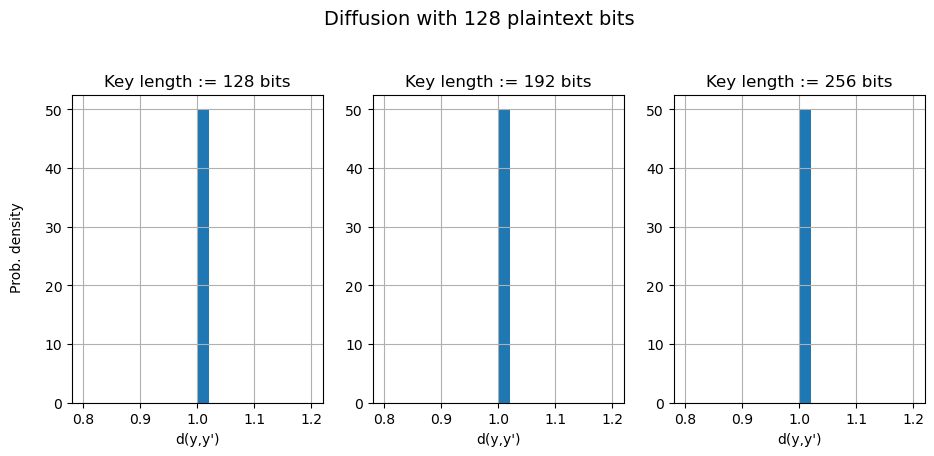

In [20]:
#plot
plot_histograms(dist, p_bits, k_bits, 'Diffusion')

Unlike block ciphers that use a mix of substitution and permutation, RC4 and its variants primarily rely on substitution (swapping of bytes). **The lack of permutation (rearranging of bytes) contributes to weaker diffusion**. In RC4, each output byte is dependent on the key, the current state of the cipher, and a single byte of the plaintext. This means that changing one bit of the plaintext will at most change one bit in the corresponding byte of the ciphertext, leading to a Hamming distance of 1.

### Confusion

In [21]:
# compute Hamming Distance with MC simulations
dist = compute_HammingDistance(p_bits, k_bits, N, is_conf=True, n=768)

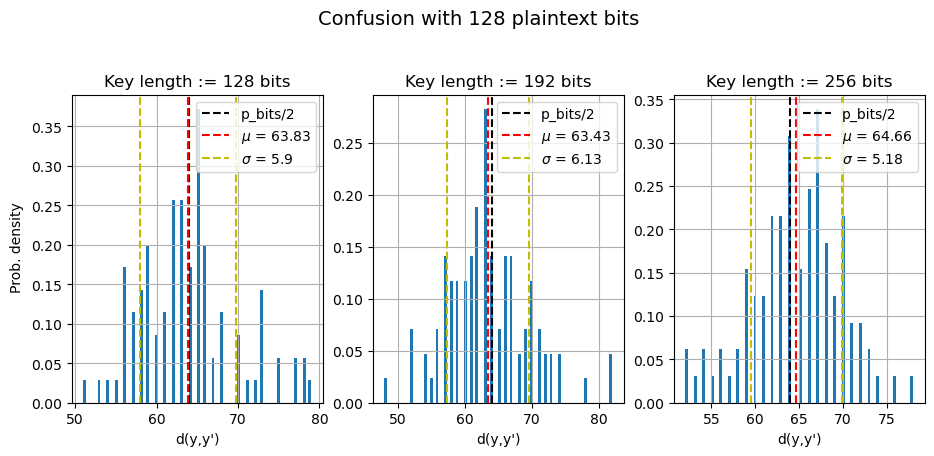

In [22]:
#plot
plot_histograms(dist, p_bits, k_bits, 'Confusion')

This time, unlike diffusion, since each output byte depends on the key there is a much stronger confusion, similar to that of block ciphers.

## Conclusion

Block ciphers, especially AES, are vital for secure digital communication. Different encryption modes like ECB, CBC, CFB, and CTR each add unique strength and resilience to the cipher, except for ECB’s limitations. ECB’s basic encryption results in identical ciphertext from identical plaintext, revealing its security flaws. Monte Carlo simulations enhance our grasp of stochastic systems, highlighting the role of statistics in cryptography. The principles of diffusion and confusion in the AES block cipher ensure that minor changes in plaintext or key cause significant, unpredictable ciphertext changes. Conversely, RC4, a stream cipher, is valued for its simplicity and speed, but it’s less secure due to vulnerabilities, including the correlation between the key and the initial output stream bytes. Even though RC4-drop variants discard initial bytes to reduce some risks, the cipher still faces fundamental security issues.

This study not only reinforces the importance of robust encryption practices but also highlights the intricate balance between security and computational efficiency, a balance that is paramount in the ever-evolving landscape of cybersecurity.

## Reference

<span id='[1]' > [1] "<a href = "block-ciphers.pdf"> Block Ciphers </a>"
<br><span id='[2]' > [2] [Advanced Encryption Standard](https://it.wikipedia.org/wiki/Advanced_Encryption_Standard) </span>